In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Model Selection
In the following task, we show how to choose the right model by evaluating an example dataset.

In [13]:
# 1. get data 'catfish.csv' and set date column as index
df = pd.read_csv('catfish.csv', parse_dates=['Date'], index_col='Date')

# 2. convert index to datetime
df.index = pd.to_datetime(df.index)


# 3. just use the data from 1.1.2004 onwards
df = df.loc['2004-01-01':]

# 5. Use two time differencing to make the data stationary
# don't forget to drop NaN values afterwards
df['Total'] = df['Total'].diff(periods=1).diff(periods=1)
df.dropna(inplace=True)

# to compare, see the result below
df.head()


,Total
Date,
2004-03-01,-1067.0
2004-04-01,-4131.0
2004-05-01,3543.0
2004-06-01,401.0
2004-07-01,-405.0


In [19]:
# define a function to plot the ADF Test (or copy it from last excercise)
# we just want to see the statistic and the p-value
def adf_test(series, title=''):
    #print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    #print out the p-value and the statistic
    print(f'p-value: {out["p-value"]}')
    print(f'ADF Test Statistic: {out["ADF Test Statistic"]}')
            




In [20]:
# check stationarity with your ADF test function
adf_test(df['Total'], title='Catfish')



p-value: 2.9462095956892035e-10
ADF Test Statistic: -7.162321332721405


<AxesSubplot: title={'center': 'Catfish'}, xlabel='Date'>

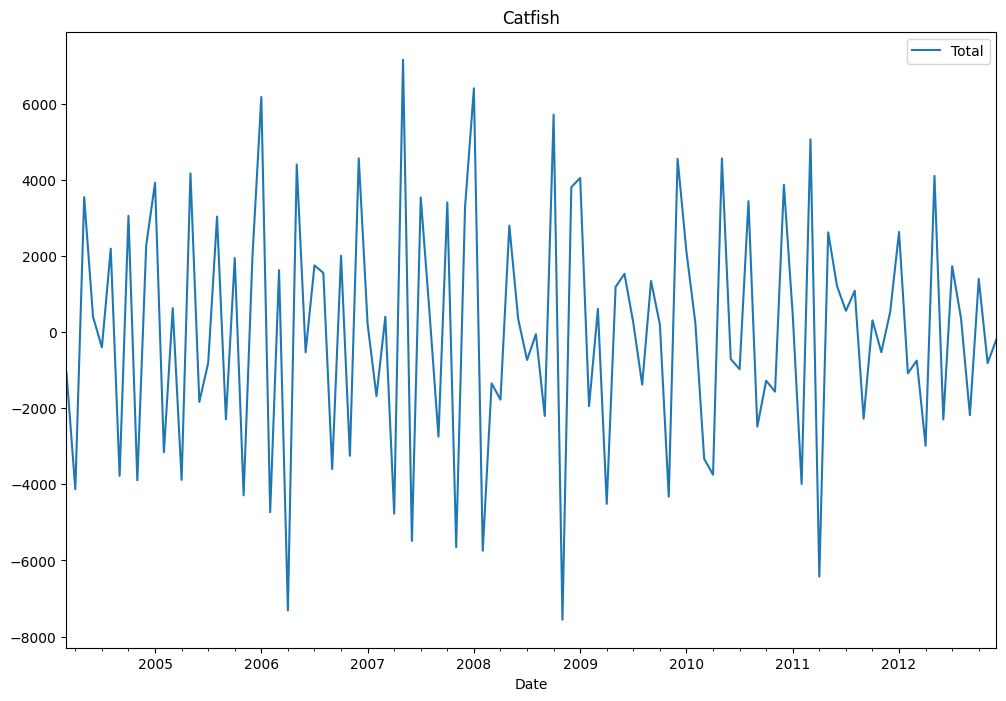

In [21]:
# inspect your data and visually check stationarity
df.plot(figsize=(12,8), title='Catfish')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


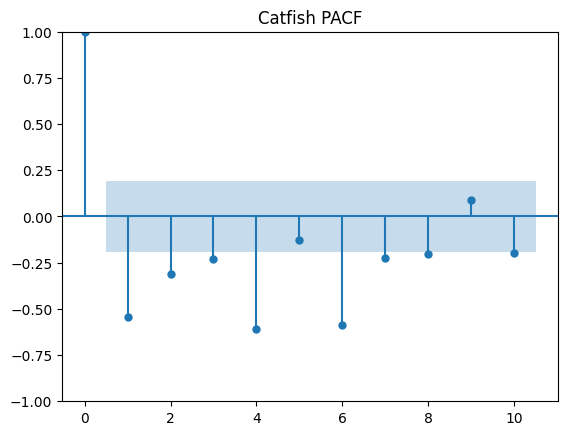

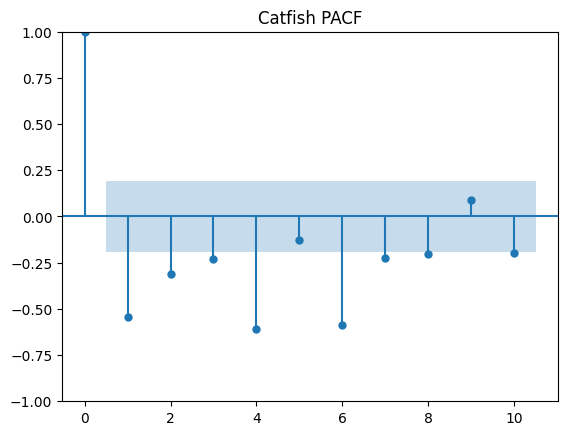

In [22]:
# plot PACF for 10 lags
plot_pacf(df['Total'], lags=10, title='Catfish PACF')

> Conclusion: <br> We should use either AR(1), AR(4), AR(6), or AR(10).

### Let's plot all of them

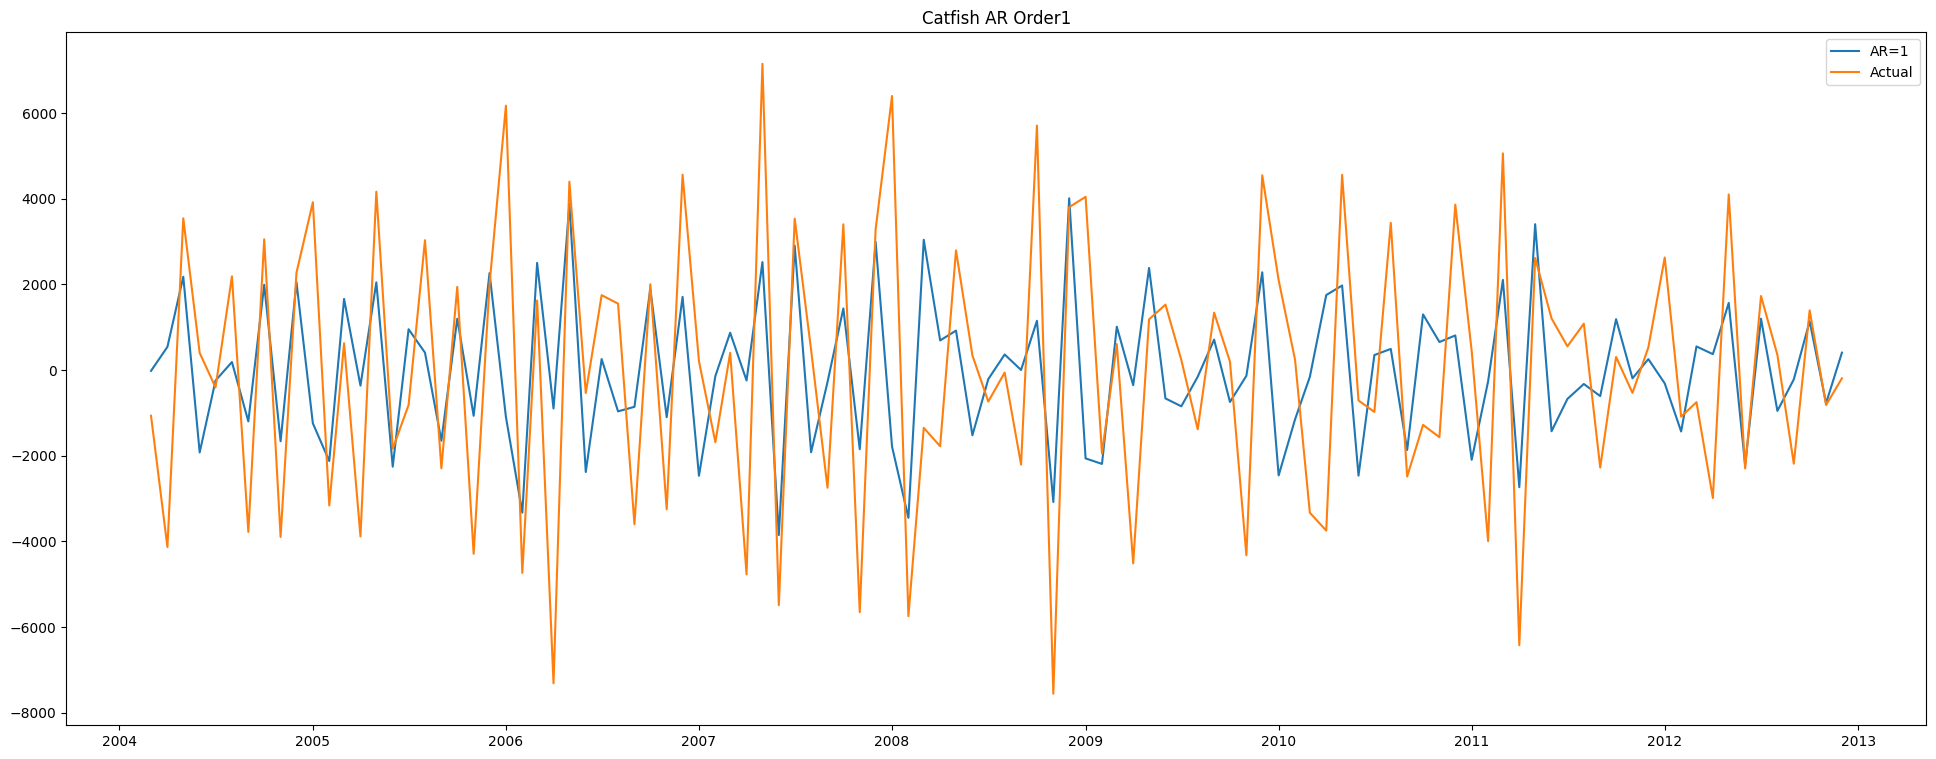

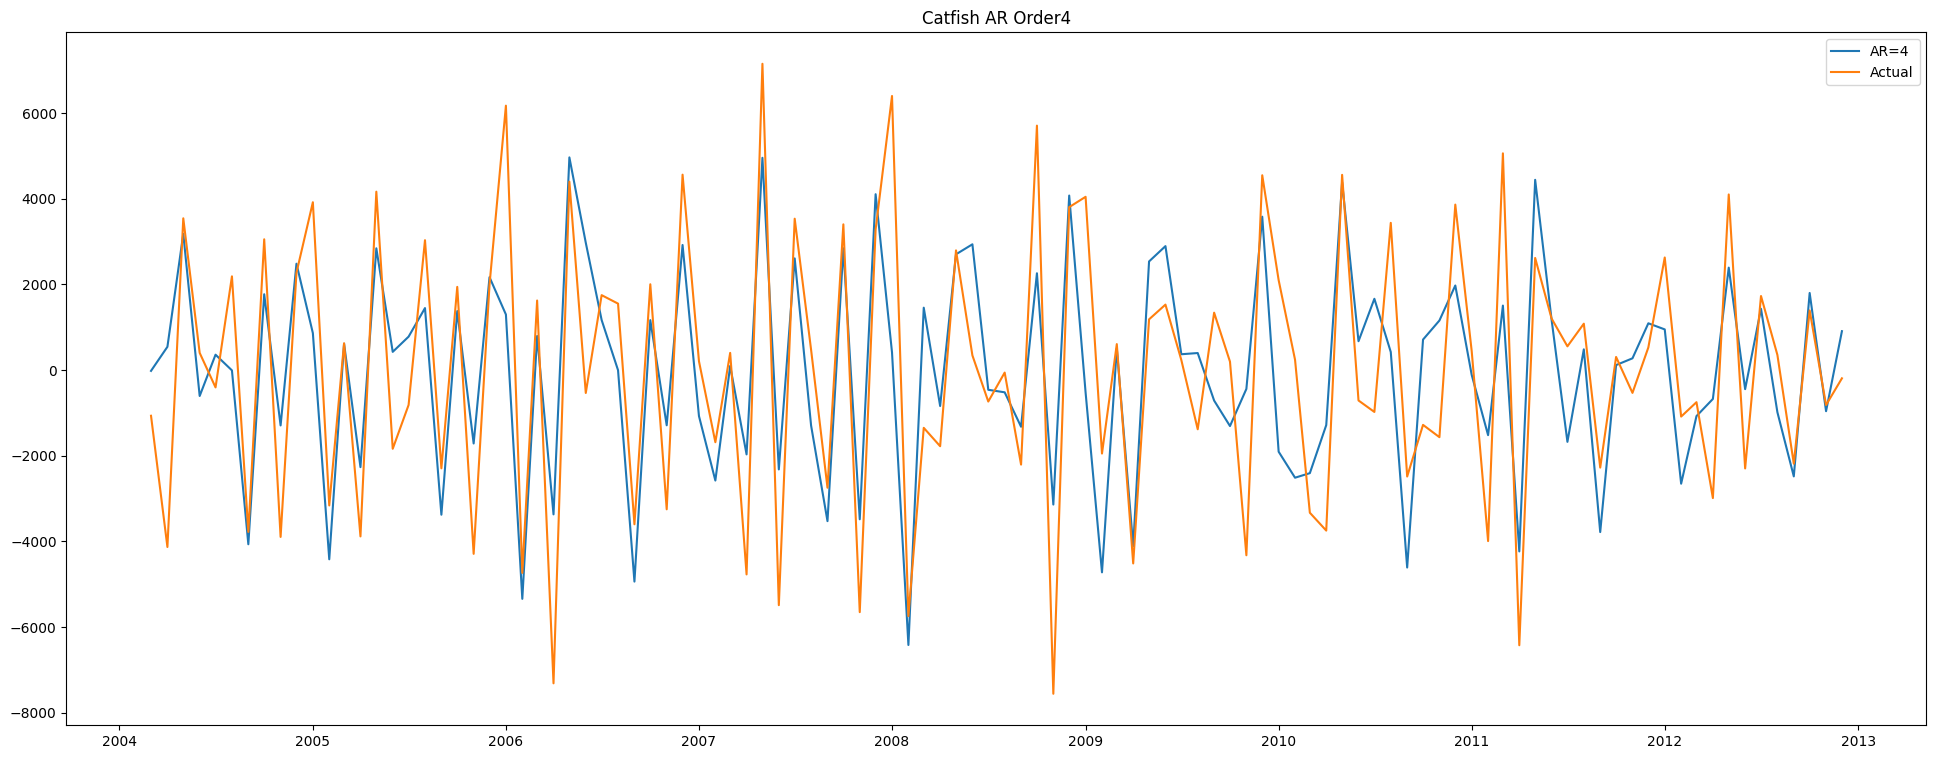

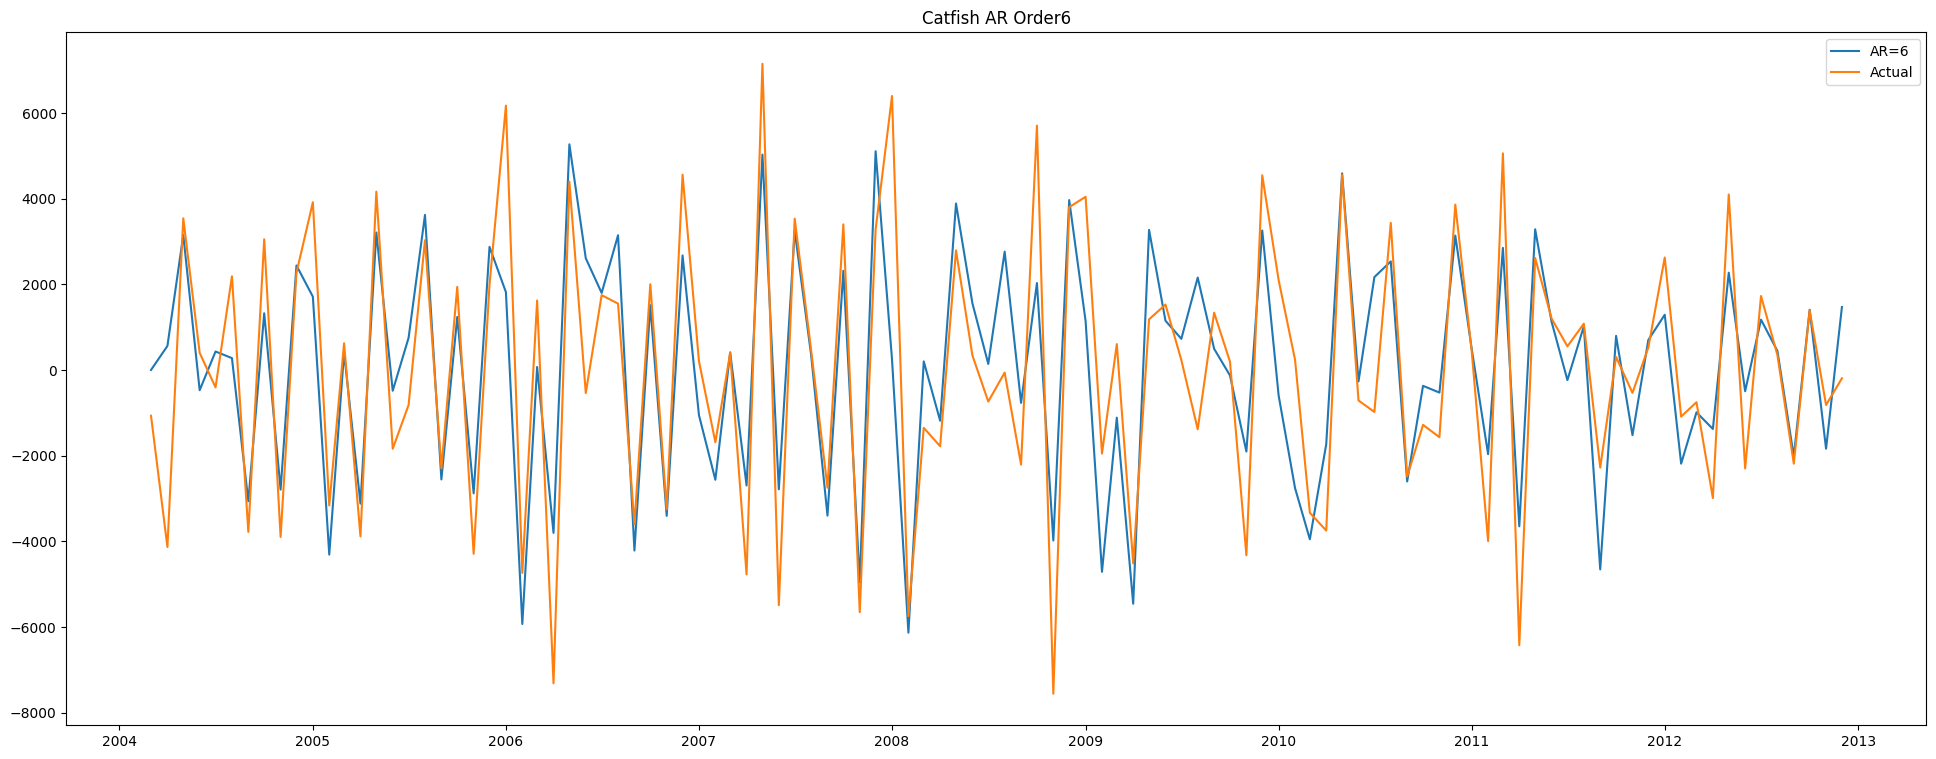

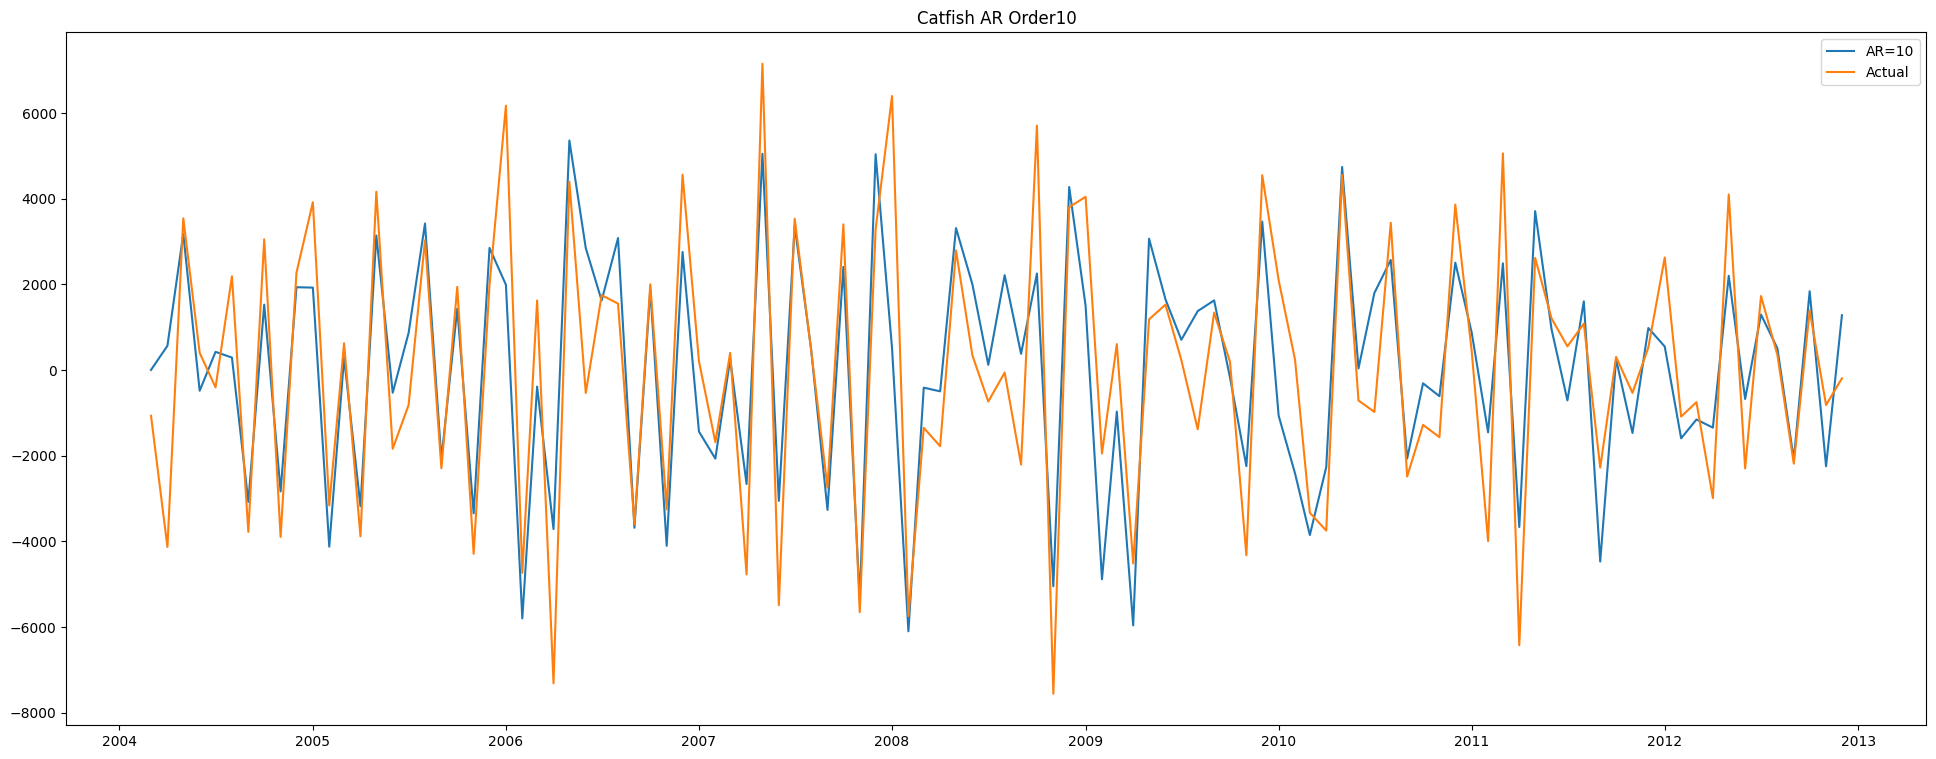

In [41]:
# setup

# use a loop to go through the ar_orders and plot all of them
ar_orders = [1, 4, 6, 10]


# plot the actual and fitted valu es
for i  in ar_orders:
    plt.figure(figsize=(24,9))
    # create a model
    model = ARIMA(df['Total'], order=(i, 0, 0))
    # fit the model
    model_fit = model.fit()
    # get the predictions
    predictions = model_fit.predict()
    # plot the predictions
    plt.plot(predictions, label=f'AR={i}')
    # plot the actual values
    plt.plot(df['Total'], label='Actual')
    plt.legend()
    plt.title('Catfish AR Order' + str(i))
    plt.linewidth=4
    plt.show()
# hint: use fittedvalues on the model fit



# Evaluate the fit and control for overfitting
In the following we use the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). Choose the AR order with the lowest value for AIC and BIC.

### Each model has: 
- a log likelihood ($l$)
- a number of parameters ($k$)
- a number of samples used for fitting ($n$)

### Akaike Information Criterion
> $AIC = 2k - 2l$ <br> Lower AIC via higher log likelihood or less parameters

### Bayesian Information Criterion
> $BIC = ln(n)k - 2l$ <br> Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [39]:
import warnings 
warnings.filterwarnings('ignore')

# Compare the AIC for every chosen AR order
# hint: there is a function to get the AIC of a fitted model
for i  in ar_orders:
    # create a model
    model = ARIMA(df['Total'], order=(i, 0, 0))
    # fit the model
    model_fit = model.fit()
    # get the AIC
    aic = model_fit.aic
    # print the AIC
    print(f'AR({i}) AIC: {aic}')


AR(1) AIC: 1980.860621744531
AR(4) AIC: 1927.6099852660268
AR(6) AIC: 1899.6497441908111
AR(10) AIC: 1902.3765449763337


> Conclusion: <br> Based on AIC criteria, pick AR(6).

In [40]:
# Compare the BIC for every chosen AR order
# hint: there is a function to get the BIC of a fitted model
for i  in ar_orders:
    # create a model
    model = ARIMA(df['Total'], order=(i, 0, 0))
    # fit the model
    model_fit = model.fit()
    # get the BIC
    bic = model_fit.bic
    # print the BIC
    print(f'AR({i}) BIC: {bic}')


AR(1) BIC: 1988.8509390268673
AR(4) BIC: 1943.590619830699
AR(6) BIC: 1920.9572569437078
AR(10) BIC: 1934.3378141056785


> Conclusion: <br> Based on BIC criteria, pick AR(6).